## Hoja de Trabajo No. 5

A continuación encontrarán un Notebook interactivo desarrollado por Anaconda.org

La idea de estet Notebook es repasar lo que hacen diferentes algoritmos (Modelos).  Todos estos modelos han sido estudiados y trabajados en clase, con la excepción de uno.

El código utlizado es muy parecido al que se ha desarrollado en clase.  

**Problema**

Ustedes han sido contratados para ayudar a un herbario de renombre.  Han presentado este código de Anaconda.org al investigador principal y le ha parecido muy interesante.  Sin embargo, el investigador siente que hace fala algo, o que podría hacerse una mejor presentación.

Su tarea es ver si es correcto el presentimiento del investigador...¿puede hacerse más eficiente, utilizarse un código más "legible", presentarse mejor?


## 1. Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

![](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)

In [24]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sb
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

## 2. Import Libraries

In [25]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load Dataset

Loading .csv dataset from url provided by kaggle, using Pandas

In [26]:
# Load dataset
import io
dataset = pd.read_csv('https://jupyterlite.anaconda.cloud/b0df9a1c-3954-4c78-96e6-07ab473bea1a/files/iris/iris.csv', na_values=['NA'])

## 3. Sumarize the Dataset

Se Imprimieron los dataset de manera que el interprete de numpy lo muestre de manera mas ordenada.

In [27]:
# Print the shape of the data
# It has 150 instances and 5 attributes
print(dataset.shape)

(150, 6)


In [28]:
# Print the first 10 rows of the data
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [29]:
# Print the last 10 rows of the data
dataset.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [30]:
# Describe some basic statistics about the data
dataset.iloc[:,1:].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4. Data cleansing

In [31]:
# First, create a dataset backup
dataset_bak = dataset

In [32]:
# Remove first column - Id
dataset = dataset.drop('Id',axis=1)
dataset = dataset.dropna(axis=1)
dataset.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [33]:
# Change column names
dataset.columns = ['Sepal-length', 'Sepal-width', 'Petal-length', 'Petal-width', 'Species']

dataset.head(20)

,Sepal-length,Sepal-width,Petal-length,Petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [34]:
# Class distribution, to see the number of rows that belong to each species
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Se normalizaron lo sdatos para obtener resultados mas precisos

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[['Sepal-length', 'Sepal-width', 'Petal-length', 'Petal-width']] = scaler.fit_transform(dataset[['Sepal-length', 'Sepal-width', 'Petal-length', 'Petal-width']])
dataset.head(20)

,Sepal-length,Sepal-width,Petal-length,Petal-width,Species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
5,-0.537178,1.957669,-1.170675,-1.050031,Iris-setosa
6,-1.506521,0.800654,-1.341272,-1.181504,Iris-setosa
7,-1.021849,0.800654,-1.284407,-1.312977,Iris-setosa
8,-1.748856,-0.356361,-1.341272,-1.312977,Iris-setosa
9,-1.143017,0.106445,-1.284407,-1.444450,Iris-setosa


## 5. Data Visualization

### 5.1. Univariate Plots

<Figure size 1000x500 with 0 Axes>

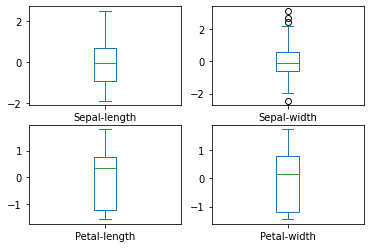

In [36]:
# Box and whisker plots. Univariate plots, one for each individual variable

fig=plt.figure(figsize=(10,5), dpi=100, facecolor='w', edgecolor='k')
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

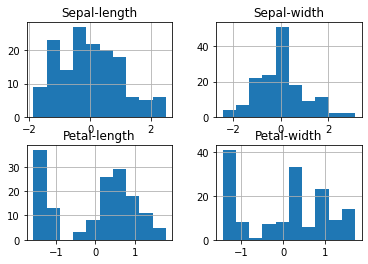

In [37]:
# Histograms. Create a histogram of each input variable to get an idea of the distribution
dataset.hist()
plt.show()

### 5.2. Multivariate Plots

Se realizaron cambios al grafico para mostrar las variables con colores diferentes

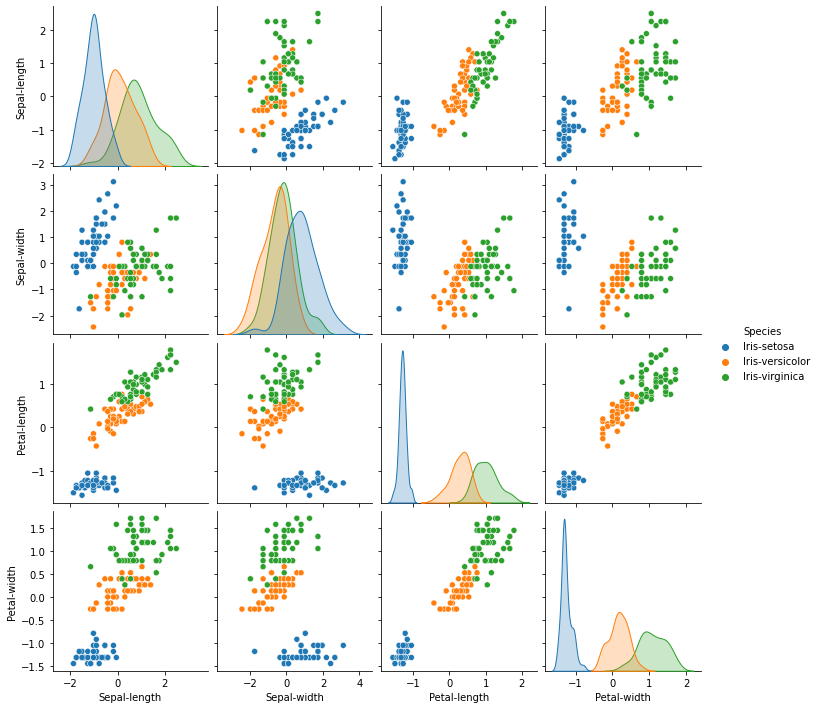

In [38]:
# Scatter plot matrix. See all pairs of attributtes, to detect correlations or relationships
sb.pairplot(dataset, hue='Species')


## 6. Evaluate Some Algorithms

- We need to know that the model we created is good.
- Use statistical methods to estimate the accuray of the models on unseen data: split the dataset in two, 80% to train, evaluate and select among our models and 20% hold back as a validation dataset

### 6.1. Create a validation dataset

In [39]:
# Split-out validation dataset

array = dataset.values
# All rows and colums except species column
X = array[:,0:4]

# Species column
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

### 6.2. Build models and evaluate them

We will use stratified 10-fold cross validation to estimate model accuracy: split the dataset in 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits

Test 6 different algorithms:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN)
4. Classification and Regression Trees (CART)
5. Gaussian Naive Bayes (NB)
6. Support Vector Machines (SVM)

In [40]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('SVM-rbf', SVC(kernel='rbf', gamma='auto')))
models.append(('SVM-poly', SVC(kernel='poly', degree=2, gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.891667 (0.112114)
LDA: 0.975000 (0.038188)
KNN: 0.950000 (0.055277)
CART: 0.941667 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.958333 (0.041667)
SVM-rbf: 0.958333 (0.041667)
SVM-poly: 0.841667 (0.058333)


### Antes de normalizar, se tenian los siguientes datos
- Support Vector Machines (SVM) has the largest estimated accuracy score: ~ 98%
- Linear Discriminant Analysis (LDA) has the second one: ~ 97%

### Al normalizar los datos, se obtienen los siguientes resultados:
- Mejor resultado: LDA ~ 97.5%
- Segundo Mejor: SVM ~ 96%

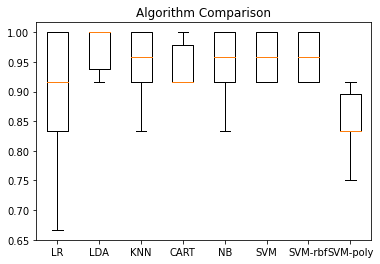

In [41]:
# Compare algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## 7. Making predictions and evaluate them

In [42]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [43]:
# Evaluate predictions by comparing them to the expected results in the validation set
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# 8. Graficas del modelo utilizado

## Datos del dataset

In [87]:
predicted_data = pd.DataFrame()

predicted_data['Sepal-length'] = X_validation[:, 0]
predicted_data['Sepal-width'] = X_validation[:, 1]
predicted_data['Petal-length'] = X_validation[:, 2]
predicted_data['Petal-width'] = X_validation[:, 3]
predicted_data['Species'] = Y_validation

import plotly.express as px

predicted_data["Species"] = predicted_data["Species"].astype("category")

fig = px.scatter(
  predicted_data, 
  x = "Petal-width", 
  y = "Petal-length", 
  color = "Species",
)

fig.show()

## Datos Predecichos por el modelo

In [88]:
predicted_data['Species'] = predictions

import plotly.express as px

predicted_data["Species"] = predicted_data["Species"].astype("category")

fig = px.scatter(
  predicted_data, 
  x = "Petal-width", 
  y = "Petal-length", 
  color = "Species",
)

fig.show()

Ahora se me ve mejor los resultados. Se puede ver como ahorita un mejor resultado que antes, clasificando a todos los de prueba correctamente.